In [130]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [131]:
size_dict = {}
for experiment in ['BSF_01','BSF_03','BSF_04','BSF_05','BSF_06','BSF_07','BSF_08']:
    template_path = f'/cluster/majf_lab/mtinti/UTR/{experiment}/res4/{experiment}/stats/{experiment}.txt'
    for line in open(template_path):
        if 'reads mapped and paired' in line:
            #print('ok')
            mapped = line.split('paired:')[1].split('\t')[1].strip()
            #print(item, mapped)
            size_dict[experiment]=int(mapped)
            break         

In [132]:
curated = pd.read_csv('gan_corrected.txt',sep='\t')
curated['original_peak']=[n.split('.')[0] for n in curated['peak_id']]
curated['status']=curated['status'].fillna('G')
print(curated.shape)
curated.head()

(6023, 8)


,contig,start,end,peak_id,status,new_start,new_end,original_peak
0,Tb927_01_v5.1,4445,4941,NA_peak_176,R,NaN,NaN,NA_peak_176
1,Tb927_01_v5.1,34851,37561,NA_peak_177,R,NaN,NaN,NA_peak_177
2,Tb927_01_v5.1,37892,39145,NA_peak_178,R,NaN,NaN,NA_peak_178
3,Tb927_01_v5.1,39346,39752,NA_peak_179,R,NaN,NaN,NA_peak_179
4,Tb927_01_v5.1,44993,45815,NA_peak_180,R,NaN,NaN,NA_peak_180


In [133]:
curated['peak_id'].value_counts()

NA_peak_2575    1
NA_peak_1375    1
NA_peak_1723    1
NA_peak_2246    1
NA_peak_3381    1
               ..
NA_peak_4143    1
NA_peak_2706    1
NA_peak_3007    1
NA_peak_3205    1
NA_peak_4647    1
Name: peak_id, Length: 6023, dtype: int64

In [134]:
#curated[curated['peak_id']=='NA_peak_609']

In [135]:
#'Tb927.1.4100'

In [136]:
original_data = pd.read_csv('../merge_macs_BSF_G/NA_peaks.xls',sep='\t',comment='#')
curated = curated.merge(original_data[['fold_enrichment','name']],how='left',left_on='original_peak',right_on='name')
curated.head()

,contig,start,end,peak_id,status,new_start,new_end,original_peak,fold_enrichment,name
0,Tb927_01_v5.1,4445,4941,NA_peak_176,R,NaN,NaN,NA_peak_176,1.39049,NA_peak_176
1,Tb927_01_v5.1,34851,37561,NA_peak_177,R,NaN,NaN,NA_peak_177,12.95294,NA_peak_177
2,Tb927_01_v5.1,37892,39145,NA_peak_178,R,NaN,NaN,NA_peak_178,7.54316,NA_peak_178
3,Tb927_01_v5.1,39346,39752,NA_peak_179,R,NaN,NaN,NA_peak_179,2.55022,NA_peak_179
4,Tb927_01_v5.1,44993,45815,NA_peak_180,R,NaN,NaN,NA_peak_180,1.57499,NA_peak_180


In [137]:
#curated['name'].value_counts()

In [138]:
curated.shape

(6023, 10)

In [139]:
curated['start'] = np.where(curated['new_start'].notna(), curated['new_start'], curated['start'])
curated['end'] = np.where(curated['new_end'].notna(), curated['new_end'], curated['end'])
curated['start']=curated['start'].astype(int)
curated['end']=curated['end'].astype(int)
curated.head()

,contig,start,end,peak_id,status,new_start,new_end,original_peak,fold_enrichment,name
0,Tb927_01_v5.1,4445,4941,NA_peak_176,R,NaN,NaN,NA_peak_176,1.39049,NA_peak_176
1,Tb927_01_v5.1,34851,37561,NA_peak_177,R,NaN,NaN,NA_peak_177,12.95294,NA_peak_177
2,Tb927_01_v5.1,37892,39145,NA_peak_178,R,NaN,NaN,NA_peak_178,7.54316,NA_peak_178
3,Tb927_01_v5.1,39346,39752,NA_peak_179,R,NaN,NaN,NA_peak_179,2.55022,NA_peak_179
4,Tb927_01_v5.1,44993,45815,NA_peak_180,R,NaN,NaN,NA_peak_180,1.57499,NA_peak_180


In [140]:
curated['peak_id']=curated['peak_id']+'_'+curated['status']

In [141]:
#curated.loc[839]

In [142]:
curated[curated['end']==curated['start']]
#tmp.sort_values()

,contig,start,end,peak_id,status,new_start,new_end,original_peak,fold_enrichment,name


In [143]:
bed_file=curated[['contig','start','end','peak_id']]
bed_file.to_csv('gan_peaks_final.bed', sep='\t',header=False, index=False)
!cp gan_peaks_final.bed ../bw_file/

In [144]:
bl =pd.read_csv('../blacklisted gene.csv',engine='python',header=None)
bl.columns = ['gene','reason']
bl['gene']=[n.strip() for n in bl['gene']]
print(bl.shape)
bl.tail()

(284, 2)


,gene,reason
279,Tb927.9.15950,UTR_contained
280,Tb927.9.6570,UTR_contained
281,Tb927.9.6830,UTR_contained
282,Tb927.9.7500,UTR_contained
283,Tb927.9.7850,UTR_contained


In [145]:
df = pd.read_csv('../UTRs.txt',sep='\t',header=None)
df.columns = ['Gene_id','utr5','utr3']
df['Chr']=[n.split(':')[0] if str(n) != 'nan' else np.nan for n in df['utr3'] ]
df['Start']=[n.split(':')[1].split('..')[0] if str(n) != 'nan' else np.nan for n in df['utr3']]
df['End']=[n.split(':')[1].split('..')[1] if str(n) != 'nan' else np.nan for n in df['utr3']]
df['Score']='.'
df['Strand']=['-' if str(n)[-1] == 'r' else '+' for n in df['utr3']]
df=df.dropna(subset=['End'])
df['diff'] = df['End'].astype(int)-df['Start'].astype(int)
df=df[df['diff']>=1]
df[df['Gene_id']=='Tb927.11.1110']

,Gene_id,utr5,utr3,Chr,Start,End,Score,Strand,diff
6572,Tb927.11.1110,NaN,Tb927_11_v5.1:314972..316981,Tb927_11_v5.1,314972,316981,.,+,2009


In [146]:
df[['Chr', 'Start', 'End','Gene_id', 'Score', 'Strand']].to_csv('UTR3_final.bed', sep='\t', header=False, index=False)

In [147]:
%%bash
bedtools intersect -a <(bedtools sort -i gan_peaks_final.bed) \
-b <(bedtools sort -i UTR3_final.bed) -wao > gan_peak_belongs_to_3UTR.bed

In [148]:
#use awk to select only the peaks with UTR overlap
!awk '$(NF-2) != "-1"' gan_peak_belongs_to_3UTR.bed > gan_peak_belongs_to_3UTR_filtered.bed

In [149]:
df = pd.read_csv('gan_peak_belongs_to_3UTR_filtered.bed',sep='\t',header=None)
df.columns = ['Chromosome','Peak_Start','Peak_End','Peak_Name',
              'UTR_Chromosome','UTR_Start','UTR_End','UTR_Gene_ID','UTR_Score','UTR_Strand','UTR_Peak_overlap']
del df['UTR_Score']
del df['UTR_Chromosome']
#df.head()

df_plus = df[df['UTR_Strand']=='+']
df_minus = df[df['UTR_Strand']=='-']
df_plus = df_plus.drop_duplicates(subset=['Peak_Name'],keep='first')
df_minus = df_minus.drop_duplicates(subset=['Peak_Name'],keep='last')
df = pd.concat([df_plus,df_minus])
df=df.sort_values(by=['Chromosome','Peak_Start','Peak_End'])
#df[df['Peak_Name']=='NA_peak_1371']

In [150]:
def is_fully_contained(X):
    p_start =  int(X['Peak_Start'])
    p_end =  int(X['Peak_End'])
    u_start =  int(X['UTR_Start'])
    u_end =  int(X['UTR_End'])
    if (p_start>=u_start) and (p_end<=u_end):
        return True
    else:
        return False
df['is_fully_contained'] = df.apply(is_fully_contained,axis=1)

In [151]:
def format_download(X):
    if X['UTR_Strand']=='-':
        orient = 'r'
    else:
        orient = 'f'
    chro =  X['Chromosome']  
    p_start =  int(X['Peak_Start'])
    p_end =  int(X['Peak_End'])
    u_start =  int(X['UTR_Start'])
    u_end =  int(X['UTR_End'])  
    
    start = max(p_start,u_start)
    end = min(p_end,u_end)
    download_string = f'{chro}:{start}..{end}:{orient}'
    return download_string   
df['download_string_overlap_sense']=df.apply(format_download,axis=1)

In [152]:
def format_download(X):
    if X['UTR_Strand']=='-':
        orient = 'f'
    else:
        orient = 'r'
    chro =  X['Chromosome']  
    p_start =  int(X['Peak_Start'])
    p_end =  int(X['Peak_End'])
    u_start =  int(X['UTR_Start'])
    u_end =  int(X['UTR_End'])  
    
    start = max(p_start,u_start)
    end = min(p_end,u_end)
    download_string = f'{chro}:{start}..{end}:{orient}'
    return download_string   
df['download_string_overlap_syntenic']=df.apply(format_download,axis=1)

In [153]:
#df[df['Peak_Name']=='NA_peak_1452_G']
df.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,download_string_overlap_sense,download_string_overlap_syntenic
0,Tb927_01_v5.1,60141,61723,NA_peak_188_R,59853,60265,Tb927.1.120,-,124,False,Tb927_01_v5.1:60141..60265:r,Tb927_01_v5.1:60141..60265:f
1,Tb927_01_v5.1,106193,107797,NA_peak_207_G,107026,107927,Tb927.1.270,+,771,False,Tb927_01_v5.1:107026..107797:f,Tb927_01_v5.1:107026..107797:r
2,Tb927_01_v5.1,112710,113415,NA_peak_211_R,112744,112971,Tb927.1.280,+,227,False,Tb927_01_v5.1:112744..112971:f,Tb927_01_v5.1:112744..112971:r
3,Tb927_01_v5.1,128932,129894,NA_peak_220_G,129518,129519,Tb927.1.305,+,1,False,Tb927_01_v5.1:129518..129519:f,Tb927_01_v5.1:129518..129519:r
4,Tb927_01_v5.1,138671,139432,NA_peak_224_R,139084,140213,Tb927.1.370,-,348,False,Tb927_01_v5.1:139084..139432:r,Tb927_01_v5.1:139084..139432:f


In [154]:
#df[df['UTR_Gene_ID'].isin(['Tb927.1.4050'])]

In [155]:
#df[df['Peak_Name']=='NA_peak_2703_G_Tb927.10.8230']

In [156]:
#df['Peak_Name'].value_counts().head(9)
df['Peak_Name']=df['Peak_Name']+'_'+df['UTR_Gene_ID']

In [157]:
#df[df['Peak_Name']=='NA_peak_1069_G']

In [158]:
#df[df['Peak_Name']=='NA_peak_609']
df.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,download_string_overlap_sense,download_string_overlap_syntenic
0,Tb927_01_v5.1,60141,61723,NA_peak_188_R_Tb927.1.120,59853,60265,Tb927.1.120,-,124,False,Tb927_01_v5.1:60141..60265:r,Tb927_01_v5.1:60141..60265:f
1,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,Tb927_01_v5.1:107026..107797:f,Tb927_01_v5.1:107026..107797:r
2,Tb927_01_v5.1,112710,113415,NA_peak_211_R_Tb927.1.280,112744,112971,Tb927.1.280,+,227,False,Tb927_01_v5.1:112744..112971:f,Tb927_01_v5.1:112744..112971:r
3,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,Tb927_01_v5.1:129518..129519:f,Tb927_01_v5.1:129518..129519:r
4,Tb927_01_v5.1,138671,139432,NA_peak_224_R_Tb927.1.370,139084,140213,Tb927.1.370,-,348,False,Tb927_01_v5.1:139084..139432:r,Tb927_01_v5.1:139084..139432:f


In [159]:
def load_fasta_sequences(fasta_path):
    sequences = {}
    for record in SeqIO.parse(fasta_path, "fasta"):
        sequences[record.id] = record.seq
    return sequences

def extract_region_from_dict(region_descriptor):
    chromosome_id, start_end, orientation = region_descriptor.split(':')
    
    start = int(start_end.split('..')[0])
    end = int(start_end.split('..')[1])
    
    if chromosome_id in sequences:
        sequence = sequences[chromosome_id][start-1:end]
        if orientation == 'r':
            sequence = sequence.reverse_complement()
        seq_record = SeqRecord(sequence, id=region_descriptor, description="")
        return seq_record.format("fasta")
    return None

# Usage with DataFrame
fasta_path = "../TriTrypDB-62_TbruceiTREU927_Genome.fasta"
sequences = load_fasta_sequences(fasta_path)

# Assuming 'df' is your DataFrame and 'coords' is the column with the genomic coordinates
df['fasta_sequences_overlap_sense'] = df['download_string_overlap_sense'].apply(extract_region_from_dict)
df.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,download_string_overlap_sense,download_string_overlap_syntenic,fasta_sequences_overlap_sense
0,Tb927_01_v5.1,60141,61723,NA_peak_188_R_Tb927.1.120,59853,60265,Tb927.1.120,-,124,False,Tb927_01_v5.1:60141..60265:r,Tb927_01_v5.1:60141..60265:f,>Tb927_01_v5.1:60141..60265:r\nAGACGCGTAATTGTT...
1,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,Tb927_01_v5.1:107026..107797:f,Tb927_01_v5.1:107026..107797:r,>Tb927_01_v5.1:107026..107797:f\nTGAGCGTCATCAA...
2,Tb927_01_v5.1,112710,113415,NA_peak_211_R_Tb927.1.280,112744,112971,Tb927.1.280,+,227,False,Tb927_01_v5.1:112744..112971:f,Tb927_01_v5.1:112744..112971:r,>Tb927_01_v5.1:112744..112971:f\nAGACTTCCTGATA...
3,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,Tb927_01_v5.1:129518..129519:f,Tb927_01_v5.1:129518..129519:r,>Tb927_01_v5.1:129518..129519:f\nTG\n
4,Tb927_01_v5.1,138671,139432,NA_peak_224_R_Tb927.1.370,139084,140213,Tb927.1.370,-,348,False,Tb927_01_v5.1:139084..139432:r,Tb927_01_v5.1:139084..139432:f,>Tb927_01_v5.1:139084..139432:r\nGTATATCTATATT...


In [160]:
df['fasta_sequences_overlap_syntenic'] = df['download_string_overlap_syntenic'].apply(extract_region_from_dict)
df.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,download_string_overlap_sense,download_string_overlap_syntenic,fasta_sequences_overlap_sense,fasta_sequences_overlap_syntenic
0,Tb927_01_v5.1,60141,61723,NA_peak_188_R_Tb927.1.120,59853,60265,Tb927.1.120,-,124,False,Tb927_01_v5.1:60141..60265:r,Tb927_01_v5.1:60141..60265:f,>Tb927_01_v5.1:60141..60265:r\nAGACGCGTAATTGTT...,>Tb927_01_v5.1:60141..60265:f\nATCATAAACCAAACC...
1,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,Tb927_01_v5.1:107026..107797:f,Tb927_01_v5.1:107026..107797:r,>Tb927_01_v5.1:107026..107797:f\nTGAGCGTCATCAA...,>Tb927_01_v5.1:107026..107797:r\nTCACTGCGATGGA...
2,Tb927_01_v5.1,112710,113415,NA_peak_211_R_Tb927.1.280,112744,112971,Tb927.1.280,+,227,False,Tb927_01_v5.1:112744..112971:f,Tb927_01_v5.1:112744..112971:r,>Tb927_01_v5.1:112744..112971:f\nAGACTTCCTGATA...,>Tb927_01_v5.1:112744..112971:r\nTCAGCAGTCTTTG...
3,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,Tb927_01_v5.1:129518..129519:f,Tb927_01_v5.1:129518..129519:r,>Tb927_01_v5.1:129518..129519:f\nTG\n,>Tb927_01_v5.1:129518..129519:r\nCA\n
4,Tb927_01_v5.1,138671,139432,NA_peak_224_R_Tb927.1.370,139084,140213,Tb927.1.370,-,348,False,Tb927_01_v5.1:139084..139432:r,Tb927_01_v5.1:139084..139432:f,>Tb927_01_v5.1:139084..139432:r\nGTATATCTATATT...,>Tb927_01_v5.1:139084..139432:f\nAAAGGAAAATAAA...


In [161]:
#make SAF file to get read counts
SAF_df = df[['Peak_Name','Chromosome','Peak_Start','Peak_End']].copy()
SAF_df.head()

,Peak_Name,Chromosome,Peak_Start,Peak_End
0,NA_peak_188_R_Tb927.1.120,Tb927_01_v5.1,60141,61723
1,NA_peak_207_G_Tb927.1.270,Tb927_01_v5.1,106193,107797
2,NA_peak_211_R_Tb927.1.280,Tb927_01_v5.1,112710,113415
3,NA_peak_220_G_Tb927.1.305,Tb927_01_v5.1,128932,129894
4,NA_peak_224_R_Tb927.1.370,Tb927_01_v5.1,138671,139432


In [162]:
SAF_df['Peak_Start']=SAF_df['Peak_Start']+50
SAF_df['Peak_End']=SAF_df['Peak_End']-50

In [163]:
SAF_df.head()

,Peak_Name,Chromosome,Peak_Start,Peak_End
0,NA_peak_188_R_Tb927.1.120,Tb927_01_v5.1,60191,61673
1,NA_peak_207_G_Tb927.1.270,Tb927_01_v5.1,106243,107747
2,NA_peak_211_R_Tb927.1.280,Tb927_01_v5.1,112760,113365
3,NA_peak_220_G_Tb927.1.305,Tb927_01_v5.1,128982,129844
4,NA_peak_224_R_Tb927.1.370,Tb927_01_v5.1,138721,139382


In [164]:
#shorten the peaks to avoid counts of adjacent peak index reads
#print(SAF_df[SAF_df['Peak_Name']=='NA_peak_609'])
#SAF_df['Peak_Start']=SAF_df['Peak_Start']+20
#print(SAF_df[SAF_df['Peak_Name']=='NA_peak_609'])
SAF_df.columns = ['GeneID','Chr','Start','End']
SAF_df['Strand']='.'
SAF_df.to_csv('G.SAF',sep='\t',index=False)
SAF_df.head()

,GeneID,Chr,Start,End,Strand
0,NA_peak_188_R_Tb927.1.120,Tb927_01_v5.1,60191,61673,.
1,NA_peak_207_G_Tb927.1.270,Tb927_01_v5.1,106243,107747,.
2,NA_peak_211_R_Tb927.1.280,Tb927_01_v5.1,112760,113365,.
3,NA_peak_220_G_Tb927.1.305,Tb927_01_v5.1,128982,129844,.
4,NA_peak_224_R_Tb927.1.370,Tb927_01_v5.1,138721,139382,.


In [171]:
#tmp = SAF_df['Start']-SAF_df['End']
#tmp.sort_values().head(10)

In [173]:
#SAF_df.loc[1379]

In [174]:
#SAF_df[SAF_df['GeneID']=='NA_peak_609']

In [175]:
#SAF_df.shape

In [176]:
#!less utr.SAF
#-B requireBothEndsMapped
#-C countChimericFragments (excluded)
#-M countMultiMappingReads (true)

In [177]:
#we now count the read pairs for each B samples and barcoded B samples
!featureCounts -p -B -C -M -T 16 -F SAF -a 'G.SAF' \
-o 'G_counts.txt' \
/cluster/majf_lab/mtinti/UTR/BSF_01/res4/BSF_01/BSF_01_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_03/res4/BSF_03/BSF_03_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_04/res4/BSF_04/BSF_04_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_05/res4/BSF_05/BSF_05_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_06/res4/BSF_06/BSF_06_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_07/res4/BSF_07/BSF_07_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_08/res4/BSF_08/BSF_08_sorted.bam \
/cluster/majf_lab/mtinti/UTR/BSF_01/res4/BSF_01/BSF_01_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_01/res4/BSF_01/BSF_01_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_01/res4/BSF_01/BSF_01_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_01/res4/BSF_01/BSF_01_sorted_RR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_03/res4/BSF_03/BSF_03_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_03/res4/BSF_03/BSF_03_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_03/res4/BSF_03/BSF_03_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_03/res4/BSF_03/BSF_03_sorted_RR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_04/res4/BSF_04/BSF_04_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_04/res4/BSF_04/BSF_04_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_04/res4/BSF_04/BSF_04_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_04/res4/BSF_04/BSF_04_sorted_RR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_05/res4/BSF_05/BSF_05_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_05/res4/BSF_05/BSF_05_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_05/res4/BSF_05/BSF_05_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_05/res4/BSF_05/BSF_05_sorted_RR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_06/res4/BSF_06/BSF_06_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_06/res4/BSF_06/BSF_06_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_06/res4/BSF_06/BSF_06_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_06/res4/BSF_06/BSF_06_sorted_RR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_07/res4/BSF_07/BSF_07_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_07/res4/BSF_07/BSF_07_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_07/res4/BSF_07/BSF_07_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_07/res4/BSF_07/BSF_07_sorted_RR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_08/res4/BSF_08/BSF_08_sorted_F.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_08/res4/BSF_08/BSF_08_sorted_R.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_08/res4/BSF_08/BSF_08_sorted_FR.bam  \
/cluster/majf_lab/mtinti/UTR/BSF_08/res4/BSF_08/BSF_08_sorted_RR.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.4

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 35 BAM files                                     ||
||                           P BSF_01_sorted.bam                              ||
||                           P BSF_03_sorted.bam                              ||
||                           P BSF_04_sorted.bam                              ||
||                           P BSF_05_sorted.bam                 

In [178]:
counts = pd.read_csv('G_counts.txt',comment='#',sep='\t',index_col=[0])
counts_col = list(counts.columns[5:])
new_names = [n.split('/')[-1].split('.')[0].replace('_sorted','') for n in counts_col]
new_names = dict(zip(counts_col, new_names))
counts = counts.rename(new_names,axis=1)
counts.head()

,Chr,Start,End,Strand,Length,BSF_01,BSF_03,BSF_04,BSF_05,BSF_06,...,BSF_06_FR,BSF_06_RR,BSF_07_F,BSF_07_R,BSF_07_FR,BSF_07_RR,BSF_08_F,BSF_08_R,BSF_08_FR,BSF_08_RR
Geneid,,,,,,,,,,,,,,,,,,,,,
NA_peak_188_R_Tb927.1.120,Tb927_01_v5.1,60191,61673,.,1483,4855,3259,169,155,10630,...,100,107,358,86,46,174,340,125,43,200
NA_peak_207_G_Tb927.1.270,Tb927_01_v5.1,106243,107747,.,1505,7088,1042,254,322,7413,...,26,39,104,54,24,28,147,104,17,39
NA_peak_211_R_Tb927.1.280,Tb927_01_v5.1,112760,113365,.,606,2612,2096,950,646,2979,...,14,22,36,0,7,18,35,0,0,6
NA_peak_220_G_Tb927.1.305,Tb927_01_v5.1,128982,129844,.,863,2940,65,104,102,4916,...,67,23,88,64,5,36,110,66,67,42
NA_peak_224_R_Tb927.1.370,Tb927_01_v5.1,138721,139382,.,662,164,74,41,30,233,...,0,0,0,0,0,1,0,0,0,0


In [179]:
counts.tail()

,Chr,Start,End,Strand,Length,BSF_01,BSF_03,BSF_04,BSF_05,BSF_06,...,BSF_06_FR,BSF_06_RR,BSF_07_F,BSF_07_R,BSF_07_FR,BSF_07_RR,BSF_08_F,BSF_08_R,BSF_08_FR,BSF_08_RR
Geneid,,,,,,,,,,,,,,,,,,,,,
NA_peak_7699_G_Tb927.11.18250,Tb927_11_v5.1,4947282,4948517,.,1236,1054,108,90,131,3108,...,43,7,8,10,25,2,15,17,42,9
NA_peak_7700_G_Tb927.11.18250,Tb927_11_v5.1,4949640,4949849,.,210,2049,1100,640,546,3099,...,3,0,186,61,1,0,200,62,34,6
NA_peak_7701_G_Tb927.11.18250,Tb927_11_v5.1,4950150,4950481,.,332,1654,984,680,508,2613,...,10,10,3,8,5,6,5,6,9,15
NA_peak_7702_G_Tb927.11.18250,Tb927_11_v5.1,4951931,4952179,.,249,415,667,471,649,765,...,0,0,0,0,0,0,0,0,0,0
NA_peak_7703_G_Tb927.11.18250,Tb927_11_v5.1,4952423,4953815,.,1393,914,75,36,23,4120,...,0,0,49,15,0,0,85,13,0,0


In [180]:
counts['B_iF_03'] = counts[['BSF_03_F','BSF_03_RR']].sum(axis=1).astype(int)
counts['B_iF_04'] = counts[['BSF_04_F','BSF_04_RR']].sum(axis=1).astype(int)
counts['B_iF_05'] = counts[['BSF_05_F','BSF_05_RR']].sum(axis=1).astype(int)

counts['G_iF_06'] = counts[['BSF_06_F','BSF_06_RR']].sum(axis=1).astype(int)
counts['G_iF_07'] = counts[['BSF_07_F','BSF_07_RR']].sum(axis=1).astype(int)
counts['G_iF_08'] = counts[['BSF_08_F','BSF_08_RR']].sum(axis=1).astype(int)

counts['B_iR_03'] = counts[['BSF_03_R','BSF_03_FR']].sum(axis=1).astype(int)
counts['B_iR_04'] = counts[['BSF_04_R','BSF_04_FR']].sum(axis=1).astype(int)
counts['B_iR_05'] = counts[['BSF_05_R','BSF_05_FR']].sum(axis=1).astype(int)

counts['G_iR_06'] = counts[['BSF_06_R','BSF_06_FR']].sum(axis=1).astype(int)
counts['G_iR_07'] = counts[['BSF_07_R','BSF_07_FR']].sum(axis=1).astype(int)
counts['G_iR_08'] = counts[['BSF_08_R','BSF_08_FR']].sum(axis=1).astype(int)
counts.head()

,Chr,Start,End,Strand,Length,BSF_01,BSF_03,BSF_04,BSF_05,BSF_06,...,B_iF_05,G_iF_06,G_iF_07,G_iF_08,B_iR_03,B_iR_04,B_iR_05,G_iR_06,G_iR_07,G_iR_08
Geneid,,,,,,,,,,,,,,,,,,,,,
NA_peak_188_R_Tb927.1.120,Tb927_01_v5.1,60191,61673,.,1483,4855,3259,169,155,10630,...,7,454,532,540,299,20,11,263,132,168
NA_peak_207_G_Tb927.1.270,Tb927_01_v5.1,106243,107747,.,1505,7088,1042,254,322,7413,...,23,207,132,186,1,2,1,81,78,121
NA_peak_211_R_Tb927.1.280,Tb927_01_v5.1,112760,113365,.,606,2612,2096,950,646,2979,...,13,68,54,41,8,7,0,28,7,0
NA_peak_220_G_Tb927.1.305,Tb927_01_v5.1,128982,129844,.,863,2940,65,104,102,4916,...,0,148,124,152,3,1,11,186,69,133
NA_peak_224_R_Tb927.1.370,Tb927_01_v5.1,138721,139382,.,662,164,74,41,30,233,...,0,0,1,0,1,0,0,0,0,0


In [181]:
counts['Peak_Name']=counts.index.values

In [182]:
counts = counts.merge(df[['Peak_Name','UTR_Strand']],how='left',left_on='Peak_Name',right_on='Peak_Name')
counts.shape

(2575, 54)

In [183]:
prot_rank_F = counts[['BSF_03_F','BSF_03_RR',
                      'BSF_04_F','BSF_04_RR',
                      'BSF_05_F','BSF_05_RR',
                      'BSF_06_F','BSF_06_RR',
                      'BSF_07_F','BSF_07_RR',
                      'BSF_08_F','BSF_08_RR',
                      'Peak_Name',
                      'UTR_Strand']]
prot_rank_R = counts[['BSF_03_R','BSF_03_FR',
                      'BSF_04_R','BSF_04_FR',
                      'BSF_05_R','BSF_05_FR',
                      'BSF_06_R','BSF_06_FR',
                      'BSF_07_R','BSF_07_FR',
                      'BSF_08_R','BSF_08_FR',
                      'Peak_Name',
                      'UTR_Strand']]
prot_rank_F.shape,prot_rank_R.shape

((2575, 14), (2575, 14))

In [184]:
counts.shape,prot_rank_F.shape,prot_rank_R.shape

((2575, 54), (2575, 14), (2575, 14))

In [185]:
#prot_rank_F.head()

In [186]:
#prot_rank_F[prot_rank_F['Peak_Name']=='NA_peak_609']

In [187]:
prot_rank_F.set_index('Peak_Name',inplace=True)
prot_rank_R.set_index('Peak_Name',inplace=True)

prot_rank_sense_1 = prot_rank_F[prot_rank_F['UTR_Strand']=='+']
prot_rank_sense_2 = prot_rank_R[prot_rank_R['UTR_Strand']=='-']
del prot_rank_sense_1['UTR_Strand']
del prot_rank_sense_2['UTR_Strand']
prot_rank_sense_1.columns = ['B1','B2','B3','B4','B5','B6','G1','G2','G3','G4','G5','G6']
prot_rank_sense_2.columns = ['B1','B2','B3','B4','B5','B6','G1','G2','G3','G4','G5','G6']
prot_rank_sense=pd.concat([prot_rank_sense_1,prot_rank_sense_2])


prot_rank_synthetic_1 = prot_rank_F[prot_rank_F['UTR_Strand']=='-']
prot_rank_synthetic_2 = prot_rank_R[prot_rank_R['UTR_Strand']=='+']
del prot_rank_synthetic_1['UTR_Strand']
del prot_rank_synthetic_2['UTR_Strand']
prot_rank_synthetic_1.columns = ['B1','B2','B3','B4','B5','B6','G1','G2','G3','G4','G5','G6']
prot_rank_synthetic_2.columns = ['B1','B2','B3','B4','B5','B6','G1','G2','G3','G4','G5','G6']
prot_rank_synthetic=pd.concat([prot_rank_synthetic_1, prot_rank_synthetic_2])


prot_rank_sense.fillna(0).to_csv('in_prot_rank_Sense2.csv')
prot_rank_synthetic.fillna(0).to_csv('in_prot_rank_Synthetic2.csv')

In [188]:
prot_rank_sense.shape,prot_rank_synthetic.shape

((2575, 12), (2575, 12))

In [189]:
prot_rank_sense.head()

,B1,B2,B3,B4,B5,B6,G1,G2,G3,G4,G5,G6
Peak_Name,,,,,,,,,,,,
NA_peak_207_G_Tb927.1.270,47,9,4,4,21,2,168,39,104,28,147,39
NA_peak_211_R_Tb927.1.280,17,68,13,26,3,10,46,22,36,18,35,6
NA_peak_220_G_Tb927.1.305,2,0,0,0,0,0,125,23,88,36,110,42
NA_peak_231_R_Tb927.1.400,0,2,0,4,0,1,7,12,2,8,4,5
NA_peak_232_R_Tb927.1.400,1,0,0,0,0,1,49,5,30,3,46,4


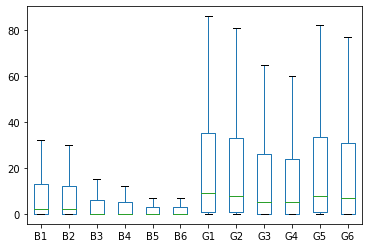

In [191]:
import matplotlib.pyplot as plt
prot_rank_sense.plot(kind='box',showfliers=False)
plt.show()

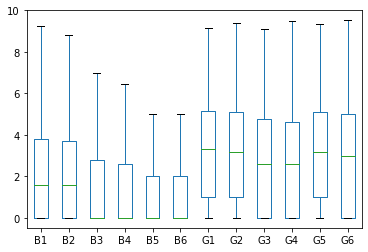

In [192]:
import matplotlib.pyplot as plt
np.log2(prot_rank_sense+1).plot(kind='box',showfliers=False)
plt.show()

In [193]:
#norm_sense = sklearn.preprocessing.quantile_transform(prot_rank_sense)
#norm_sense = pd.DataFrame(norm_sense,columns =prot_rank_sense.columns,index=prot_rank_sense.index.values)
#norm_sense

In [194]:
#prot_rank_sense.loc['NA_peak_4380'],prot_rank_synthetic.loc['NA_peak_4380']

In [195]:
size_dict
#np.log10(57045590)

{'BSF_01': 57045590,
 'BSF_03': 44041520,
 'BSF_04': 33926564,
 'BSF_05': 35432770,
 'BSF_06': 70786836,
 'BSF_07': 56237448,
 'BSF_08': 64461908}

In [196]:
57045590
10000000

10000000

In [197]:
normed_sense = prot_rank_sense.copy()
normed_sense['B1']=((normed_sense['B1']/size_dict['BSF_03'])*10000000).astype(int)
normed_sense['B2']=((normed_sense['B2']/size_dict['BSF_03'])*10000000).astype(int)
normed_sense['B3']=((normed_sense['B3']/size_dict['BSF_04'])*10000000).astype(int)
normed_sense['B4']=((normed_sense['B4']/size_dict['BSF_04'])*10000000).astype(int)
normed_sense['B5']=((normed_sense['B5']/size_dict['BSF_05'])*10000000).astype(int)
normed_sense['B6']=((normed_sense['B6']/size_dict['BSF_05'])*10000000).astype(int)

normed_sense['G1']=((normed_sense['G1']/size_dict['BSF_06'])*10000000).astype(int)
normed_sense['G2']=((normed_sense['G2']/size_dict['BSF_06'])*10000000).astype(int)
normed_sense['G3']=((normed_sense['G3']/size_dict['BSF_07'])*10000000).astype(int)
normed_sense['G4']=((normed_sense['G4']/size_dict['BSF_07'])*10000000).astype(int)
normed_sense['G5']=((normed_sense['G5']/size_dict['BSF_08'])*10000000).astype(int)
normed_sense['G6']=((normed_sense['G6']/size_dict['BSF_08'])*10000000).astype(int)

print(normed_sense.shape)
filter_id = [True if '_G_' in n else False for n in normed_sense.index.values]
normed_sense=normed_sense[filter_id]
print(normed_sense.shape)
normed_sense.head()

(2575, 12)
(2282, 12)


,B1,B2,B3,B4,B5,B6,G1,G2,G3,G4,G5,G6
Peak_Name,,,,,,,,,,,,
NA_peak_207_G_Tb927.1.270,10,2,1,1,5,0,23,5,18,4,22,6
NA_peak_220_G_Tb927.1.305,0,0,0,0,0,0,17,3,15,6,17,6
NA_peak_237_G_Tb927.1.420,0,0,0,0,0,0,8,9,16,9,17,12
NA_peak_255_G_Tb927.1.480,0,0,0,0,0,0,0,2,1,3,1,6
NA_peak_257_G_Tb927.1.490,0,2,0,3,0,0,0,2,0,2,0,2


In [198]:
#ranksums??

In [199]:
#normed_sense=np.log2(normed_sense+1)
#normed_sense.head()

In [200]:
#normed_synthetic = ((prot_rank_synthetic/prot_rank_synthetic.sum())*1000000).copy().astype(int)
normed_synthetic = prot_rank_synthetic.copy()
normed_synthetic['B1']=((normed_synthetic['B1']/size_dict['BSF_03'])*10000000).astype(int)
normed_synthetic['B2']=((normed_synthetic['B2']/size_dict['BSF_03'])*10000000).astype(int)
normed_synthetic['B3']=((normed_synthetic['B3']/size_dict['BSF_04'])*10000000).astype(int)
normed_synthetic['B4']=((normed_synthetic['B4']/size_dict['BSF_04'])*10000000).astype(int)
normed_synthetic['B5']=((normed_synthetic['B5']/size_dict['BSF_05'])*10000000).astype(int)
normed_synthetic['B6']=((normed_synthetic['B6']/size_dict['BSF_05'])*10000000).astype(int)


normed_synthetic['G1']=((normed_synthetic['G1']/size_dict['BSF_06'])*10000000).astype(int)
normed_synthetic['G2']=((normed_synthetic['G2']/size_dict['BSF_06'])*10000000).astype(int)
normed_synthetic['G3']=((normed_synthetic['G3']/size_dict['BSF_07'])*10000000).astype(int)
normed_synthetic['G4']=((normed_synthetic['G4']/size_dict['BSF_07'])*10000000).astype(int)
normed_synthetic['G5']=((normed_synthetic['G5']/size_dict['BSF_08'])*10000000).astype(int)
normed_synthetic['G6']=((normed_synthetic['G6']/size_dict['BSF_08'])*10000000).astype(int)

print(normed_synthetic.shape)
filter_id = [True if '_G_' in n else False for n in normed_synthetic.index.values]
normed_synthetic=normed_synthetic[filter_id]
print(normed_synthetic.shape)
normed_synthetic.head()

(2575, 12)
(2282, 12)


,B1,B2,B3,B4,B5,B6,G1,G2,G3,G4,G5,G6
Peak_Name,,,,,,,,,,,,
NA_peak_262_G_Tb927.1.580,0,0,0,0,0,0,0,2,3,4,1,3
NA_peak_263_G_Tb927.1.600,0,0,0,0,0,0,0,0,5,3,1,2
NA_peak_264_G_Tb927.1.630,0,0,0,0,0,0,0,0,0,0,0,0
NA_peak_266_G_Tb927.1.650,2,0,0,0,0,0,15,2,20,2,15,2
NA_peak_269_G_Tb927.1.690,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
#normed_synthetic=np.log2(normed_synthetic+1)
#normed_synthetic.head()

In [202]:
#multipletests
#        - `bonferroni` : one-step correction
#        - `sidak` : one-step correction
#        - `holm-sidak` : step down method using Sidak adjustments
#        - `holm` : step-down method using Bonferroni adjustments
#        - `simes-hochberg` : step-up method  (independent)
#        - `hommel` : closed method based on Simes tests (non-negative)
#        - `fdr_bh` : Benjamini/Hochberg  (non-negative)
#        - `fdr_by` : Benjamini/Yekutieli (negative)
#        - `fdr_tsbh` : two stage fdr correction (non-negative)
#        - `fdr_tsbky` : two stage fdr correction (non-negative)

In [203]:
from scipy.stats import ranksums, wilcoxon
_ = wilcoxon([0,0,0,0,0,0],[1,1,1,1,1,1])
_.pvalue

/homes/mtinti/miniconda3/envs/ritSeq/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


0.014305878435429648

In [204]:
from scipy.stats import ranksums, wilcoxon
_ = wilcoxon([0,0,0],[1,1,1])
_.pvalue

0.0832645166635504

In [205]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_rel, wilcoxon

def perform_test(df, columns_first_condition, columns_second_condition, log_offset=1e-6):
    df=df.copy()
    data_first = df[columns_first_condition]
    data_second = df[columns_second_condition]
    
    # Compute means for each condition
    mean_first = np.log2(data_first+1).mean(axis=1)
    mean_second = np.log2(data_second+1).mean(axis=1)
    
    # Perform t-test
    #t_results = ttest_ind(data_first, data_second, axis=1, nan_policy='omit', equal_var=False)
    #t_results = ttest_rel(data_first, data_second, axis=1,nan_policy='omit')
    #print(t_results)
    # Calculate directions of the differences
    pvals = []
    for x, y in zip(data_first.values,data_second.values):
        try:
            _ = wilcoxon(x, y)
            pvals.append(_.pvalue)
        except:
            pvals.append(1)
    pvals = np.array(pvals)
    
    directions = (mean_second - mean_first).apply(lambda x: 'increased' if x > 0 else 'decreased')
    
    # Log2 Fold Change (avoiding log0 by adding log_offset)
    log2_fold_change = mean_second - mean_first
    
    # Log2 Average Intensity
    log2_avg_intensity = (mean_first + mean_second) / 2 
    
    # Handle NaN p-values: exclude NaN p-values from FDR correction
    #valid_pvalues = pvals[~np.isnan(pvals)]
    #corrected_pvals = np.full(pvals, np.nan)  # Initialize full NaN array to store FDR results
    #_, corrected_pvals[~np.isnan(t_results.pvalue)], _, _ = 
    _, corrected_pvals, _, _  = multipletests(pvals, method='fdr_bh')
     
    # Add results to the DataFrame
    df['p_values'] = pvals
    df['fdr'] = corrected_pvals
    df['direction'] = directions
    df['log2_fold_change'] = log2_fold_change
    df['log2_avg_intensity'] = log2_avg_intensity
    
    return df

normed_sense = perform_test(normed_sense, ['B1', 'B2', 'B3', 'B4', 'B5', 'B6'],['G1', 'G2', 'G3', 'G4', 'G5', 'G6'])
normed_synthetic = perform_test(normed_synthetic, ['B1', 'B2', 'B3','B4', 'B5', 'B6'], ['G1', 'G2', 'G3', 'G4', 'G5', 'G6'])


In [206]:
#normed_sense_[normed_sense_['fdr']<0.05].shape

In [207]:
#pd.Series(filter_id).value_counts()

In [208]:
filter_id = [True if '_G_' in n else False for n in df['Peak_Name'].values]
print(df.shape)
df=df[filter_id]
print(df.shape)

(2575, 14)
(2282, 14)


In [209]:
#df.merge(normed_sence.reset_index(),how='left',left_on='Peak_Name',right_on='Peak_Name').drop_duplicates(subset=['Peak_Name']).shape

In [210]:
df.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,download_string_overlap_sense,download_string_overlap_syntenic,fasta_sequences_overlap_sense,fasta_sequences_overlap_syntenic
1,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,Tb927_01_v5.1:107026..107797:f,Tb927_01_v5.1:107026..107797:r,>Tb927_01_v5.1:107026..107797:f\nTGAGCGTCATCAA...,>Tb927_01_v5.1:107026..107797:r\nTCACTGCGATGGA...
3,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,Tb927_01_v5.1:129518..129519:f,Tb927_01_v5.1:129518..129519:r,>Tb927_01_v5.1:129518..129519:f\nTG\n,>Tb927_01_v5.1:129518..129519:r\nCA\n
9,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,Tb927_01_v5.1:158412..159019:f,Tb927_01_v5.1:158412..159019:r,>Tb927_01_v5.1:158412..159019:f\nTTGACGAACCTCG...,>Tb927_01_v5.1:158412..159019:r\nGGATCCCTACTCA...
10,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,Tb927_01_v5.1:186030..187218:f,Tb927_01_v5.1:186030..187218:r,>Tb927_01_v5.1:186030..187218:f\nTATGTGACCCATT...,>Tb927_01_v5.1:186030..187218:r\nAAATACATAATTT...
11,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,Tb927_01_v5.1:190120..190499:f,Tb927_01_v5.1:190120..190499:r,>Tb927_01_v5.1:190120..190499:f\nATTGTTGTGTCTT...,>Tb927_01_v5.1:190120..190499:r\nGCTCTACTGCAGC...


In [211]:
#df[df['UTR_Gene_ID']=='Tb927.4.2880']

In [212]:
#normed_sense.loc['NA_peak_694_G_Tb927.4.2880']

In [213]:
#prot_rank_F.loc['NA_peak_694_G_Tb927.4.2880']

In [75]:
#prot_rank_F.sum()

In [214]:
#prot_rank_F.loc['NA_peak_694_G_Tb927.4.2880']

In [215]:
#duplicate = df['Peak_Name'].value_counts()
#duplicate = set(duplicate[duplicate>1].index.values)
#df[df['Peak_Name'].isin(duplicate)]

In [216]:
#normed_sence

In [217]:
print(df.shape)
df_sense = df.merge(normed_sense.reset_index(),left_on='Peak_Name',right_on='Peak_Name')
print(df_sense.shape)
df_sense.head()

(2282, 14)
(2282, 31)


,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G2,G3,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity
0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,...,5,18,4,22,6,0.026857,0.068653,increased,1.906890,2.558338
1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,...,3,15,6,17,6,0.026857,0.068653,increased,3.325760,1.662880
2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,...,9,16,9,17,12,0.027281,0.068653,increased,3.628601,1.814301
3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,...,2,1,3,1,6,0.042168,0.090695,increased,1.398720,0.699360
4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,...,2,0,2,0,2,0.654721,0.779381,increased,0.194988,0.694988


In [218]:
df_sense[df_sense['fdr']<0.1].shape

(1108, 31)

In [219]:
df_sense[(df_sense['fdr']<0.1) & (df_sense['log2_fold_change']>0)]['log2_fold_change'].min()

0.5974937501201927

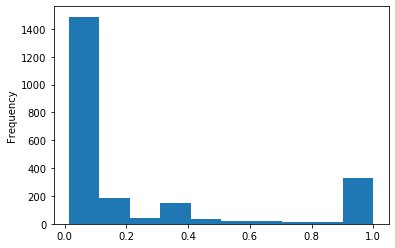

In [220]:
(df_sense['p_values']).plot(kind='hist',bins=10)

In [221]:
literature = df_sense[df_sense['UTR_Gene_ID'].isin([
    'Tb927.4.560',
    'Tb927.3.930',
    'Tb927.4.870',
    'Tb927.1.700',
    'Tb927.11.3620',
    'Tb927.10.8490',
    'Tb927.4.2310',
    'Tb927.4.2880',
    'Tb927.7.2660',
    'Tb927.9.2470',
    'Tb927.10.2010',
    'Tb927.11.8990',
    'Tb927.11.14250',
    'Tb927.2.6000',
    'Tb927.8.2780',
    'Tb927.10.3800',
    'Tb927.11.11330',
    'Tb927.11.12100',
    'Tb927.8.6750',
    'Tb927.5.800',
    'Tb927.10.5620'
])]
literature.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G2,G3,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity
10,Tb927_01_v5.1,232035,232934,NA_peak_270_G_Tb927.1.700,231675,232503,Tb927.1.700,-,468,False,...,0,0,0,0,0,0.027708,0.068653,decreased,-2.969589,1.484794
320,Tb927_04_v5.1,238021,239067,NA_peak_1219_G_Tb927.4.870,237697,238337,Tb927.4.870,-,316,False,...,6,6,8,5,4,0.027281,0.068653,increased,2.115254,1.655121
460,Tb927_05_v5.1,332964,334600,NA_peak_1595_G_Tb927.5.800,330484,334686,Tb927.5.800,+,1636,True,...,0,0,0,0,0,0.065600,0.122905,decreased,-2.000000,1.000000
976,Tb927_08_v5.1,835912,837779,NA_peak_2929_G_Tb927.8.2780,829519,836888,Tb927.8.2780,+,976,False,...,0,0,0,0,0,0.027281,0.068653,decreased,-3.272731,1.636365
1462,Tb927_10_v5.1,996559,998405,NA_peak_4411_G_Tb927.10.3800,998124,998398,Tb927.10.3800,-,274,False,...,0,0,0,2,3,0.027281,0.068653,decreased,-2.267773,1.731380


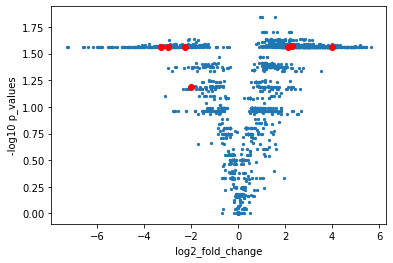

In [222]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(df_sense['log2_fold_change'], -np.log10(df_sense['p_values'] ), s=5)
ax.scatter(literature['log2_fold_change'], -np.log10(literature['p_values']),c='r' ,label='Literature')
plt.xlabel('log2_fold_change')
plt.ylabel('-log10 p_values')
plt.show()

In [223]:
##-np.log10(0.05)

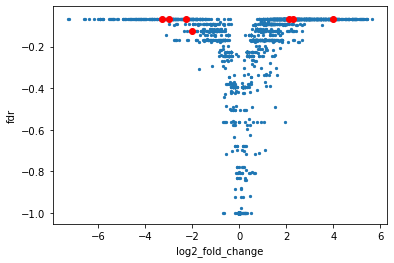

In [224]:
fig,ax=plt.subplots()
ax.scatter(df_sense['log2_fold_change'], -df_sense['fdr'], s=5)
ax.scatter(literature['log2_fold_change'], -literature['fdr'], c='r' )
plt.xlabel('log2_fold_change')
plt.ylabel('fdr')
plt.show()

In [225]:
#-np.log10(0.1)
df_sense[ (df_sense['log2_fold_change']>0) & (df_sense['fdr']<0.1)].shape

(807, 31)

In [226]:

#'Tb927.10.5620' manual adjust peak
#'Tb927.5.120' just a few reads, unmappable
#'Tb927.11.8990' low after norm
#'Tb927.9.8880' peak not called high control
#'Tb927.1.4100' peak not called high control
#'Tb927.10.8320' no peak call


In [227]:
np.array(df_sense.columns)

array(['Chromosome', 'Peak_Start', 'Peak_End', 'Peak_Name', 'UTR_Start',
       'UTR_End', 'UTR_Gene_ID', 'UTR_Strand', 'UTR_Peak_overlap',
       'is_fully_contained', 'download_string_overlap_sense',
       'download_string_overlap_syntenic',
       'fasta_sequences_overlap_sense',
       'fasta_sequences_overlap_syntenic', 'B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'p_values', 'fdr',
       'direction', 'log2_fold_change', 'log2_avg_intensity'],
      dtype=object)

In [228]:
del df_sense['download_string_overlap_syntenic']
del df_sense['fasta_sequences_overlap_syntenic']

In [229]:
df_sense.to_csv('final_sense2.csv')

In [230]:
print(df.shape)
df_synthetic = df.merge(normed_synthetic.reset_index(),left_on='Peak_Name',right_on='Peak_Name')
print(df_synthetic.shape)
df_synthetic.head()

(2282, 14)
(2282, 31)


,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G2,G3,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity
0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,...,3,9,4,16,2,0.027708,0.059259,increased,2.719380,1.359690
1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,...,9,11,0,10,10,0.043114,0.081514,increased,2.721376,1.624848
2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,...,10,2,5,2,9,0.027281,0.059259,increased,2.256041,1.128021
3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,...,5,1,7,3,13,0.027281,0.059259,increased,2.232053,1.116026
4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,...,16,5,22,12,26,0.027708,0.059259,increased,3.398047,1.963184


In [231]:
del df_synthetic['download_string_overlap_sense']
del df_synthetic['fasta_sequences_overlap_sense']

In [232]:
df_synthetic.to_csv('final_synthetic2.csv')

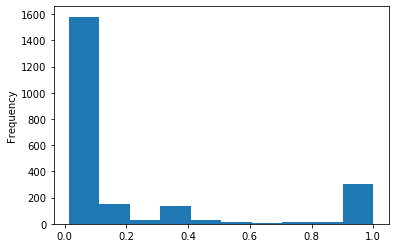

In [233]:
(df_synthetic['p_values']).plot(kind='hist',bins=10)

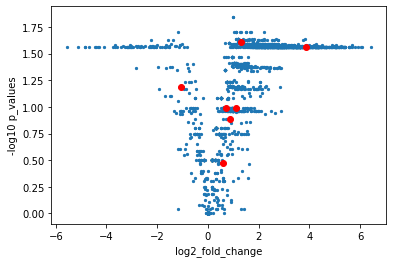

In [234]:
literature = df_synthetic[df_synthetic['UTR_Gene_ID'].isin([
    'Tb927.4.560',
    'Tb927.3.930',
    'Tb927.4.870',
    'Tb927.1.700',
    'Tb927.11.3620',
    'Tb927.10.8490',
    'Tb927.4.2310',
    'Tb927.4.2880',
    'Tb927.7.2660',
    'Tb927.9.2470',
    'Tb927.10.2010',
    'Tb927.11.8990',
    'Tb927.11.14250',
    'Tb927.2.6000',
    'Tb927.8.2780',
    'Tb927.10.3800',
    'Tb927.11.11330',
    'Tb927.11.12100',
    'Tb927.8.6750',
    'Tb927.5.800',
    'Tb927.10.5620'
])]
literature.head()


import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(df_synthetic['log2_fold_change'], -np.log10(df_synthetic['p_values'] ),s=5)
ax.scatter(literature['log2_fold_change'], -np.log10(literature['p_values']),c='r' ,label='Literature')
plt.xlabel('log2_fold_change')
plt.ylabel('-log10 p_values')
plt.show()

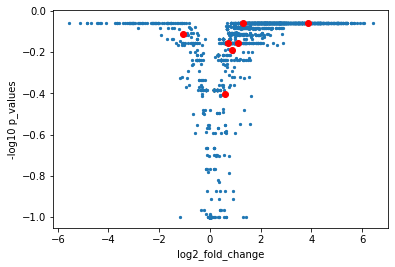

In [235]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(df_synthetic['log2_fold_change'], -(df_synthetic['fdr'] ),s=5)
ax.scatter(literature['log2_fold_change'], -(literature['fdr']) , c='r' ,label='Literature')
plt.xlabel('log2_fold_change')
plt.ylabel('-log10 p_values')
plt.show()

In [236]:
df_synthetic[ (df_synthetic['log2_fold_change']>0) & (df_synthetic['fdr']<0.1)].shape

(1145, 29)

In [237]:
import pandas as pd
df_sense =pd.read_csv('final_sense2.csv',index_col=[0])
tot=0
out = open('sequences_overlap_sense_down_200.fa','w')
for seq in df_sense.sort_values('log2_fold_change',ascending=False).tail(400)['fasta_sequences_overlap_sense']:
    if len(seq.split('\n'))>5:
        #print(seq.split('\n'))
        out.write(seq)
        tot+=1     
out.close() 
print(tot)

tot=0
out = open('sequences_overlap_sense_up_200.fa','w')
for seq in df_sense.sort_values('log2_fold_change',ascending=False).head(400)['fasta_sequences_overlap_sense']:
    if len(seq.split('\n'))>5:
        out.write(seq)
        tot+=1
print(tot)
out.close() 

316
293


In [239]:
df_sense.sort_values('log2_fold_change',ascending=False).head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G2,G3,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity
975,Tb927_08_v5.1,825258,826896,NA_peak_2928_G_Tb927.8.2770,826653,827161,Tb927.8.2770,+,243,False,...,54,62,48,63,42,0.027708,0.068653,increased,5.651356,2.992345
1660,Tb927_10_v5.1,3006985,3008198,NA_peak_4810_G_Tb927.10.12400,3006046,3007248,Tb927.10.12400,-,263,False,...,48,40,44,37,47,0.027708,0.068653,increased,5.448220,2.724110
1881,Tb927_11_v5.1,1210574,1211570,NA_peak_6877_G_Tb927.11.4150,1210488,1210737,Tb927.11.4150,-,163,False,...,52,36,44,42,49,0.027708,0.068653,increased,5.444879,2.722439
1904,Tb927_11_v5.1,1459748,1461065,NA_peak_6925_G_Tb927.11.5100,1460532,1461121,Tb927.11.5100,+,533,False,...,45,61,43,53,36,0.027708,0.068653,increased,5.407642,2.967981
525,Tb927_05_v5.1,948083,949540,NA_peak_1725_G_Tb927.5.2820,947140,948423,Tb927.5.2820,-,340,False,...,59,36,37,42,31,0.027708,0.068653,increased,5.405732,2.702866


In [240]:
df_sense.columns#['download_string_overlap']

Index(['Chromosome', 'Peak_Start', 'Peak_End', 'Peak_Name', 'UTR_Start',
       'UTR_End', 'UTR_Gene_ID', 'UTR_Strand', 'UTR_Peak_overlap',
       'is_fully_contained', 'download_string_overlap_sense',
       'fasta_sequences_overlap_sense', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6',
       'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'p_values', 'fdr', 'direction',
       'log2_fold_change', 'log2_avg_intensity'],
      dtype='object')

In [241]:
bed_peaks = open('gan_peaks_final.bed','w')
for index,start,end,chromosome_id in zip(df_sense['Peak_Name'],
                                   df_sense['Peak_Start'],
                                   df_sense['Peak_End'],
                                   df_sense['Chromosome']):
    
    download_string = f'{chromosome_id}\t{start}\t{end}\t{index}\n'
    bed_peaks.write(download_string)
bed_peaks.close()  
!cp gan_peaks_final.bed ../bw_file/    

In [242]:
bed_region = open('gan_regions_final.bed','w')
for index,region_descriptor in zip(df_sense['Peak_Name'],df_sense['download_string_overlap_sense']):
    chromosome_id, start_end, orientation = region_descriptor.split(':')
    start = int(start_end.split('..')[0])
    end = int(start_end.split('..')[1])
    download_string = f'{chromosome_id}\t{start}\t{end}\t{index}\n'
    bed_region.write(download_string)
bed_region.close()  
!cp gan_regions_final.bed ../bw_file/

In [243]:
#df_sense[df_sense['UTR_Gene_ID'].isin(['Tb927.4.2880','Tb927.11.8990'])]

In [244]:
#meme sequences_overlap_sense_up.fa -dna -oc . -nostatus -time 14400 -mod anr -nmotifs 3 -minw 6 -maxw 50 -objfun de -neg sequences_overlap_sense_down.fa -markov_order 0

In [245]:
!rm -r 'meme_300'
!~/miniconda3/envs/meme/bin/meme sequences_overlap_sense_up_200.fa -objfun de -p 16  -markov_order 0 \
-neg sequences_overlap_sense_down_200.fa -dna -mod anr -nmotifs 3 -o 'meme_300'

rm: cannot remove ‘meme_300’: No such file or directory
Writing results to output directory 'meme_300'.
BACKGROUND: using background model of order 0
PRIMARY (de): n 293 p0 146 p1 73 p2 74
CONTROL (de): n 316 c0 158 c1 79 c2 79
SEQUENCE GROUP USAGE-- Starts/EM: p0 vs c0; Trim: p1 vs c1; pvalue: p2 vs c1,c2; nsites: p0,p1,p2 vs c0,c1,c2
SEEDS: maxwords 60316 highwater mark: seq 103 pos 107
BALANCE: samples 103 chars 61609 nodes 16 chars/node 3850

seqs=   293, min_w= 183, max_w= 2648, total_size=   180235

motif=1
SEED DEPTHS: estimated from data
SEED WIDTHS: 8 11 15 21 29 41 50
em: w=   8, psites=1422, iter=  40 
motif=2
SEED DEPTHS: estimated from data
SEED WIDTHS: 8 11 15 21 29 41 50
em: w=   8, psites=  28, iter=  30 
motif=3
SEED DEPTHS: estimated from data
SEED WIDTHS: 8 11 15 21 29 41 50
em: w=   8, psites=  28, iter=  30 


In [246]:
#df_synthetic.sort_values('log2_fold_change',ascending=False)

In [247]:
import pandas as pd
df_sense=pd.read_csv('final_sense2.csv',index_col=[0])
df_sense.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G2,G3,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity
0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,...,5,18,4,22,6,0.026857,0.068653,increased,1.906890,2.558338
1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,...,3,15,6,17,6,0.026857,0.068653,increased,3.325760,1.662880
2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,...,9,16,9,17,12,0.027281,0.068653,increased,3.628601,1.814301
3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,...,2,1,3,1,6,0.042168,0.090695,increased,1.398720,0.699360
4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,...,2,0,2,0,2,0.654721,0.779381,increased,0.194988,0.694988


In [248]:
gff = pd.read_csv('../bw_file/merged_fixed.gff',
                  sep='\t',comment='#',header=None)
gff = gff[gff.iloc[:,0].isin(df_sense['Chromosome'].unique())]
gff = gff[gff.iloc[:,2]=='five_prime_UTR']
gff.columns = ['Chromosome','source','ann_type','start','end','score','strand','other','note']
gff = gff[gff['source']=='VEuPathDB']
gff.head(10)

,Chromosome,source,ann_type,start,end,score,strand,other,note
2618,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,3244,3246,.,+,.,ID=utr_Tb927.8.110:pseudogenic_transcript_1;Pa...
2637,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,12682,18906,.,+,.,ID=utr_Tb927.8.150:pseudogenic_transcript_1;Pa...
2687,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,46530,46607,.,+,.,ID=utr_Tb927.8.260:pseudogenic_transcript_1;Pa...
2693,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,51024,62485,.,+,.,ID=utr_Tb927.8.270:pseudogenic_transcript_1;Pa...
2718,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,80097,84580,.,+,.,ID=utr_Tb927.8.320:pseudogenic_transcript_1;Pa...
2728,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,90887,90924,.,+,.,ID=utr_Tb927.8.340:pseudogenic_transcript_1;Pa...
2744,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,101170,101222,.,+,.,ID=utr_Tb927.8.370:pseudogenic_transcript_1;Pa...
2749,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,102499,102528,.,+,.,ID=utr_Tb927.8.380:pseudogenic_transcript_1;Pa...
2802,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,129542,132809,.,+,.,ID=utr_Tb927.8.470:pseudogenic_transcript_1;Pa...
2813,Tb927_08_v5.1,VEuPathDB,five_prime_UTR,136692,137806,.,-,.,ID=utr_Tb927.8.480:mRNA_1;Parent=Tb927.8.480:mRNA


In [249]:
df_sense.columns

Index(['Chromosome', 'Peak_Start', 'Peak_End', 'Peak_Name', 'UTR_Start',
       'UTR_End', 'UTR_Gene_ID', 'UTR_Strand', 'UTR_Peak_overlap',
       'is_fully_contained', 'download_string_overlap_sense',
       'fasta_sequences_overlap_sense', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6',
       'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'p_values', 'fdr', 'direction',
       'log2_fold_change', 'log2_avg_intensity'],
      dtype='object')

In [250]:
has_5prime = []
has_5prime_loc = []
from tqdm.auto import tqdm
for index in tqdm(df_sense.index.values):
    Chromosome = df_sense.loc[index]['Chromosome']
    Peak_Start = int(df_sense.loc[index]['Peak_Start'])
    Peak_End = int(df_sense.loc[index]['Peak_End'])
    UTR_Start = int(df_sense.loc[index]['UTR_Start'])
    UTR_End = int(df_sense.loc[index]['UTR_End'])
    UTR_Strand = df_sense.loc[index]['UTR_Strand']
    UTR_Gene_ID = df_sense.loc[index]['UTR_Gene_ID']
   
    if UTR_Strand == '+':
        tmp_gff=gff[ (gff['strand']=='+') &  (gff['Chromosome']==Chromosome)]
        tmp_gff=tmp_gff[ (tmp_gff['start']>UTR_End) & (tmp_gff['start']<Peak_End) ]
        if tmp_gff.shape[0] > 0:
            five_prime =  tmp_gff.iloc[0]
            five_prime_start = five_prime['start']
            five_prime_end = five_prime['end']
            five_prime_gene = five_prime['note'].split('_')[1].split(':')[0]
            #print(UTR_Gene_ID,five_prime_start,five_prime_gene)
            #print(five_prime)
            has_5prime.append('yes')
            has_5prime_loc.append(f'{five_prime_start}:{five_prime_gene}')
            
        else:
            has_5prime.append('no')
            has_5prime_loc.append('no')
        
        
    if UTR_Strand == '-':
        tmp_gff=gff[ (gff['strand']=='-') &  (gff['Chromosome']==Chromosome)]
        tmp_gff=tmp_gff[ (tmp_gff['end']>Peak_Start) & (tmp_gff['end']<UTR_End) ]
        if tmp_gff.shape[0] > 0:
            five_prime =  tmp_gff.iloc[0]
            five_prime_start = five_prime['start']
            five_prime_end = five_prime['end']
            five_prime_gene = five_prime['note'].split('_')[1].split(':')[0]
            #print(UTR_Gene_ID,five_prime_start,five_prime_gene)
            #print(five_prime)
            has_5prime.append('yes')
            has_5prime_loc.append(f'{five_prime_end}:{five_prime_gene}')
        else:
            has_5prime.append('no')
            has_5prime_loc.append('no')
assert(len(has_5prime)==df_sense.shape[0])
        
        
        

In [251]:
df_sense['has_5prime']=has_5prime
df_sense['has_5prime_loc']=has_5prime_loc
df_sense.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity,has_5prime,has_5prime_loc
0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,...,4,22,6,0.026857,0.068653,increased,1.906890,2.558338,no,no
1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,...,6,17,6,0.026857,0.068653,increased,3.325760,1.662880,no,no
2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,...,9,17,12,0.027281,0.068653,increased,3.628601,1.814301,no,no
3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,...,3,1,6,0.042168,0.090695,increased,1.398720,0.699360,no,no
4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,...,2,0,2,0.654721,0.779381,increased,0.194988,0.694988,yes,190648:Tb927.1.500


In [252]:
df_sense[ (df_sense['log2_fold_change']>0) & (df_sense['fdr']<0.1)]['has_5prime'].value_counts()

yes    468
no     339
Name: has_5prime, dtype: int64

In [253]:
df_sense.to_csv('final_sense3.csv')

In [1]:
import pandas as pd

df_sense = pd.read_csv('final_sense3.csv')#
df_sense.head()
#.sort_values('log2_fold_change').tail(50)

,Unnamed: 0,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,...,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity,has_5prime,has_5prime_loc
0,0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,...,4,22,6,0.026857,0.068653,increased,1.906890,2.558338,no,no
1,1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,...,6,17,6,0.026857,0.068653,increased,3.325760,1.662880,no,no
2,2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,...,9,17,12,0.027281,0.068653,increased,3.628601,1.814301,no,no
3,3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,...,3,1,6,0.042168,0.090695,increased,1.398720,0.699360,no,no
4,4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,...,2,0,2,0.654721,0.779381,increased,0.194988,0.694988,yes,190648:Tb927.1.500


In [2]:
df_sense.shape

(2282, 32)

In [255]:
df_synthetic=pd.read_csv('final_synthetic2.csv',index_col=[0])
df_synthetic.head()

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G2,G3,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity
0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,...,3,9,4,16,2,0.027708,0.059259,increased,2.719380,1.359690
1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,...,9,11,0,10,10,0.043114,0.081514,increased,2.721376,1.624848
2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,...,10,2,5,2,9,0.027281,0.059259,increased,2.256041,1.128021
3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,...,5,1,7,3,13,0.027281,0.059259,increased,2.232053,1.116026
4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,...,16,5,22,12,26,0.027708,0.059259,increased,3.398047,1.963184


In [256]:
has_5prime = []
has_5prime_loc = []
from tqdm.auto import tqdm
for index in tqdm(df_synthetic.index.values):
    Chromosome = df_sense.loc[index]['Chromosome']
    Peak_Start = int(df_sense.loc[index]['Peak_Start'])
    Peak_End = int(df_sense.loc[index]['Peak_End'])
    UTR_Start = int(df_sense.loc[index]['UTR_Start'])
    UTR_End = int(df_sense.loc[index]['UTR_End'])
    UTR_Strand = df_sense.loc[index]['UTR_Strand']
    UTR_Gene_ID = df_sense.loc[index]['UTR_Gene_ID']
   
    if UTR_Strand == '+':
        tmp_gff=gff[ (gff['strand']=='+') &  (gff['Chromosome']==Chromosome)]
        tmp_gff=tmp_gff[ (tmp_gff['start']>UTR_End) & (tmp_gff['start']<Peak_End) ]
        if tmp_gff.shape[0] > 0:
            five_prime =  tmp_gff.iloc[0]
            five_prime_start = five_prime['start']
            five_prime_end = five_prime['end']
            five_prime_gene = five_prime['note'].split('_')[1].split(':')[0]
            #print(UTR_Gene_ID,five_prime_start,five_prime_gene)
            #print(five_prime)
            has_5prime.append('yes')
            has_5prime_loc.append(f'{five_prime_start}:{five_prime_gene}')
            
        else:
            has_5prime.append('no')
            has_5prime_loc.append('no')
        
        
    if UTR_Strand == '-':
        tmp_gff=gff[ (gff['strand']=='-') &  (gff['Chromosome']==Chromosome)]
        tmp_gff=tmp_gff[ (tmp_gff['end']>Peak_Start) & (tmp_gff['end']<UTR_End) ]
        if tmp_gff.shape[0] > 0:
            five_prime =  tmp_gff.iloc[0]
            five_prime_start = five_prime['start']
            five_prime_end = five_prime['end']
            five_prime_gene = five_prime['note'].split('_')[1].split(':')[0]
            #print(UTR_Gene_ID,five_prime_start,five_prime_gene)
            #print(five_prime)
            has_5prime.append('yes')
            has_5prime_loc.append(f'{five_prime_end}:{five_prime_gene}')
        else:
            has_5prime.append('no')
            has_5prime_loc.append('no')

assert(len(has_5prime)==df_synthetic.shape[0])
        
        
df_synthetic['has_5prime']=has_5prime
df_synthetic['has_5prime_loc']=has_5prime_loc
df_synthetic.head()       

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity,has_5prime,has_5prime_loc
0,Tb927_01_v5.1,106193,107797,NA_peak_207_G_Tb927.1.270,107026,107927,Tb927.1.270,+,771,False,...,4,16,2,0.027708,0.059259,increased,2.719380,1.359690,no,no
1,Tb927_01_v5.1,128932,129894,NA_peak_220_G_Tb927.1.305,129518,129519,Tb927.1.305,+,1,False,...,0,10,10,0.043114,0.081514,increased,2.721376,1.624848,no,no
2,Tb927_01_v5.1,157569,159019,NA_peak_237_G_Tb927.1.420,158412,159278,Tb927.1.420,+,607,False,...,5,2,9,0.027281,0.059259,increased,2.256041,1.128021,no,no
3,Tb927_01_v5.1,185962,188900,NA_peak_255_G_Tb927.1.480,186030,187218,Tb927.1.480,+,1188,False,...,7,3,13,0.027281,0.059259,increased,2.232053,1.116026,no,no
4,Tb927_01_v5.1,190120,191359,NA_peak_257_G_Tb927.1.490,190086,190499,Tb927.1.490,+,379,False,...,22,12,26,0.027708,0.059259,increased,3.398047,1.963184,yes,190648:Tb927.1.500


In [257]:
df_synthetic[ (df_synthetic['log2_fold_change']>0) & (df_synthetic['fdr']<0.1)]['has_5prime'].value_counts()

yes    788
no     357
Name: has_5prime, dtype: int64

In [258]:
df_synthetic.to_csv('final_synthetic3.csv')

In [ ]:
'''
As well as using “has_DS_splice_site” and “DS_splice_site_loc”, 
shall we also now use “Fragment_Start”, “Fragment_End”, “Fragment_Name”, “UTR_Fragment_overlap”.
'''

In [268]:
df_sense[df_sense['UTR_Gene_ID'].isin([
    'Tb927.5.810'
])]
         
         

,Chromosome,Peak_Start,Peak_End,Peak_Name,UTR_Start,UTR_End,UTR_Gene_ID,UTR_Strand,UTR_Peak_overlap,is_fully_contained,...,G4,G5,G6,p_values,fdr,direction,log2_fold_change,log2_avg_intensity,has_5prime,has_5prime_loc
